In [84]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import re

sns.set_style('darkgrid')
sns.set_palette('viridis')

DATA_PATH_2020 = './data/2020.csv'
DATA_PATH_2019 = './data/2019.csv'
DATA_PATH_2018 = './data/2018.csv'

df_2018 = pd.read_csv(DATA_PATH_2018)
df_2019 = pd.read_csv(DATA_PATH_2019)
df_2020 = pd.read_csv(DATA_PATH_2020)

technology = 'Your main technology / programming language'
age = 'Age'

In [3]:
def merge(data_frames, common_columns=[]):
    return pd.concat(data_frames, ignore_index=True)[common_columns]

In [4]:
# Merge the 2019 and 2020 datasets on common columns
merged_df = merge(data_frames=[df_2019, df_2020], common_columns=[age, technology])
print('Total number of rows', merged_df.shape[0])
assert merged_df.shape[0] == df_2019.shape[0] + df_2020.shape[0]

Total number of rows 2244


## Univariate Analysis: Age

In [5]:
# Explore the portion of missing data in age column
print('Number of Age missing rows', sum(merged_df[age].isna()))
print('Percentage of Age missing', 100*sum(merged_df[age].isna())/merged_df[age].shape[0])

Number of Age missing rows 136
Percentage of Age missing 6.0606060606060606


In [6]:
# Explore the mean, min, max, quartiles of the age column
statistics_df = merged_df.loc[:, [age]].describe()
mode_df = merged_df.loc[:, [age]].mode().rename(index={0: 'mode'})
statistics_df = pd.concat([statistics_df, mode_df]).transpose()
print("Central Tendancy and Spread of Age:")
statistics_df

Central Tendancy and Spread of Age:


,count,mean,std,min,25%,50%,75%,max,mode
Age,2108.0,32.470588,5.498379,20.0,29.0,32.0,35.0,69.0,30.0


|Expectation|Collected|Match?|
|:----|:----|:----|
|Most form submitters are young aged.|75% of form submitters are between 20-35 years|✔|
|There’s should be no teen-ager or child because this is an IT salary, and people below 20 very few of them are hired in the IT industry.|Youngest age was 20, no year below.|✔|

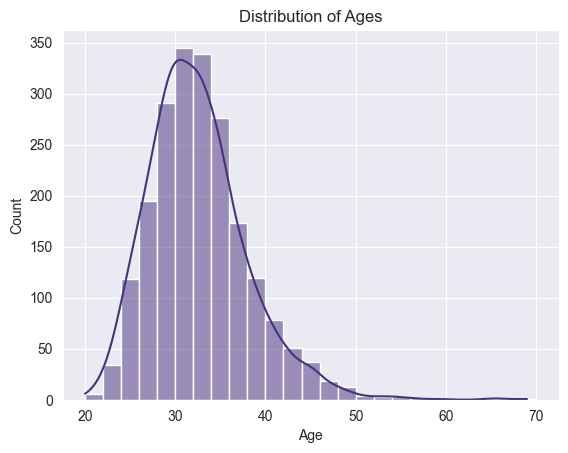

In [7]:
# Distribution of age for employees who worked in IT and submitted the form
sns.histplot(data=merged_df[age], kde=True, binwidth=2)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages')
plt.show()

|Expectation|Collected|Match?|
|---|--|--|
|Mean and mode of the responders age are quite close to each.	| This supports that the distribution is somewhat symmetric, not right or left skewed by outliers (high values). |✔|

### Imputing missing Age values

In [8]:
# Impute the missing values with mode
# Because it's significantly repeated 500 times, 25% of form responders are in their 30s.
# Although the mode is very close to the mean 
# The mode is chosen for imputation.
# Since the mean is slightly right shifted by the very few old ages(outliers).
# However, the mode is not affected by them
age_mode=mode_df.loc['mode', age]
merged_df[age] = merged_df[age].fillna(age_mode)
assert sum(merged_df[age].isna()) == 0

## Univariate Analysis: Langauages and Technologies

In [9]:
# Explore the portion of missing data in age column
print('Number of technology missing rows', sum(merged_df[technology].isna()))
print('Percentage of technology missing', 100*sum(merged_df[technology].isna())/merged_df[technology].shape[0])

Number of technology missing rows 141
Percentage of technology missing 6.283422459893048


In [10]:
# Statistics about the technology
unique_technologies = merged_df[technology].unique()
print("Number of unique langauages: ", len(unique_technologies))
print("Most repeated technology among IT Employees: ", merged_df.loc[:, [technology]].mode().iloc[0,0])

Number of unique langauages:  275
Most repeated technology among IT Employees:  Python


By investigating the data, values are comma-separated words. Hence, we'll no longer use the python built-in unique(), instead, we will implement our getUnique.

In [27]:
none_values = [None, 'nan', 'nothing', 'not relevant', 'none', '']

def clean_languages(df):
    cleaned_df = pd.DataFrame(columns=[technology, age])
    for _, row in df.iterrows():
        if row[technology] is not None and type(row[technology]) is not float:
            # split string using , / &
            values = re.split("[,&/]", row[technology])
            for value in values:
                # remove leading and trailing spaces
                # change to lower case
                processed_value = value.strip().lower().replace(".", "")
                if ("go" in processed_value):
                    cleaned_df.loc[len(cleaned_df.index)] = ['go', row['Age']]
                elif(processed_value == "js"):
                    cleaned_df.loc[len(cleaned_df.index)] = ['javascript', row['Age']]
                elif ("cloud" in processed_value or "devops" in processed_value):
                    cleaned_df.loc[len(cleaned_df.index)] = ['cloud', row['Age']]
                elif (processed_value not in none_values):
                    cleaned_df.loc[len(cleaned_df.index)] = [processed_value, row['Age']]
    return cleaned_df

In [49]:
cleaned_df = clean_languages(merged_df)
unique_technologies = cleaned_df[technology].unique()
print("After data cleaning and inforcing consistency\nNumber of unique langauges: ", len(unique_technologies))

After data cleaning and inforcing consistency
Number of unique langauges:  170


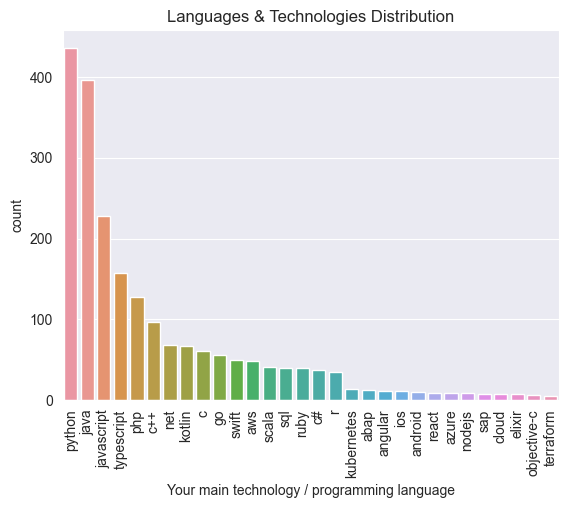

In [58]:
# Distribution of Technologies for employees who worked in IT and submitted the form
tech_counts = cleaned_df[technology].value_counts()

# Filter out technologies that appear less than 5 times
tech_counts = tech_counts[tech_counts >= 5]

# filter dataframe to only include rows with technologies that appear 5 times or more
cleaned_df = cleaned_df[cleaned_df[technology].isin(tech_counts.index)]
sns.countplot(data=cleaned_df, x=technology, order=tech_counts.index)
plt.xticks(rotation=90)
plt.title('Languages & Technologies Distribution')
plt.show()

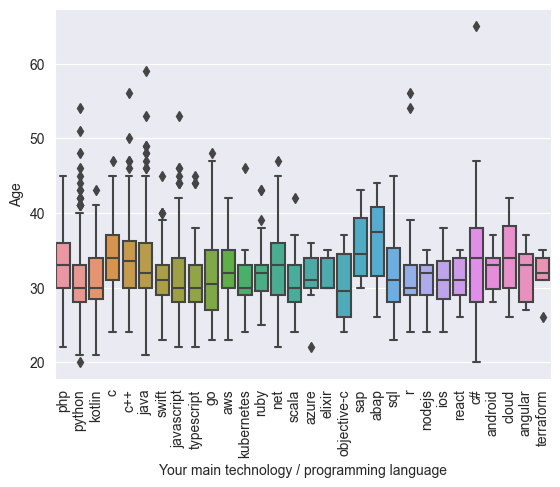

In [61]:
sns.boxplot(x=technology, y=age, data=cleaned_df)
plt.xticks(rotation=90)
plt.show()

- The median of most technologies lies around the 30s, this is obvious since employees at their 30s are represented with high frequency
- It's shown that the 3rd quartile for go, c# reaches people above their 45s which makes since, such langauages has exicted since a while
- Then goes java, c, c++ and php, net and sql

C:\Users\User\AppData\Local\Temp\ipykernel_4748\1170586020.py:13: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_grouped['percentage'] = df_grouped.groupby(age)['count'].apply(lambda x: 100 * x / float(x.sum()))


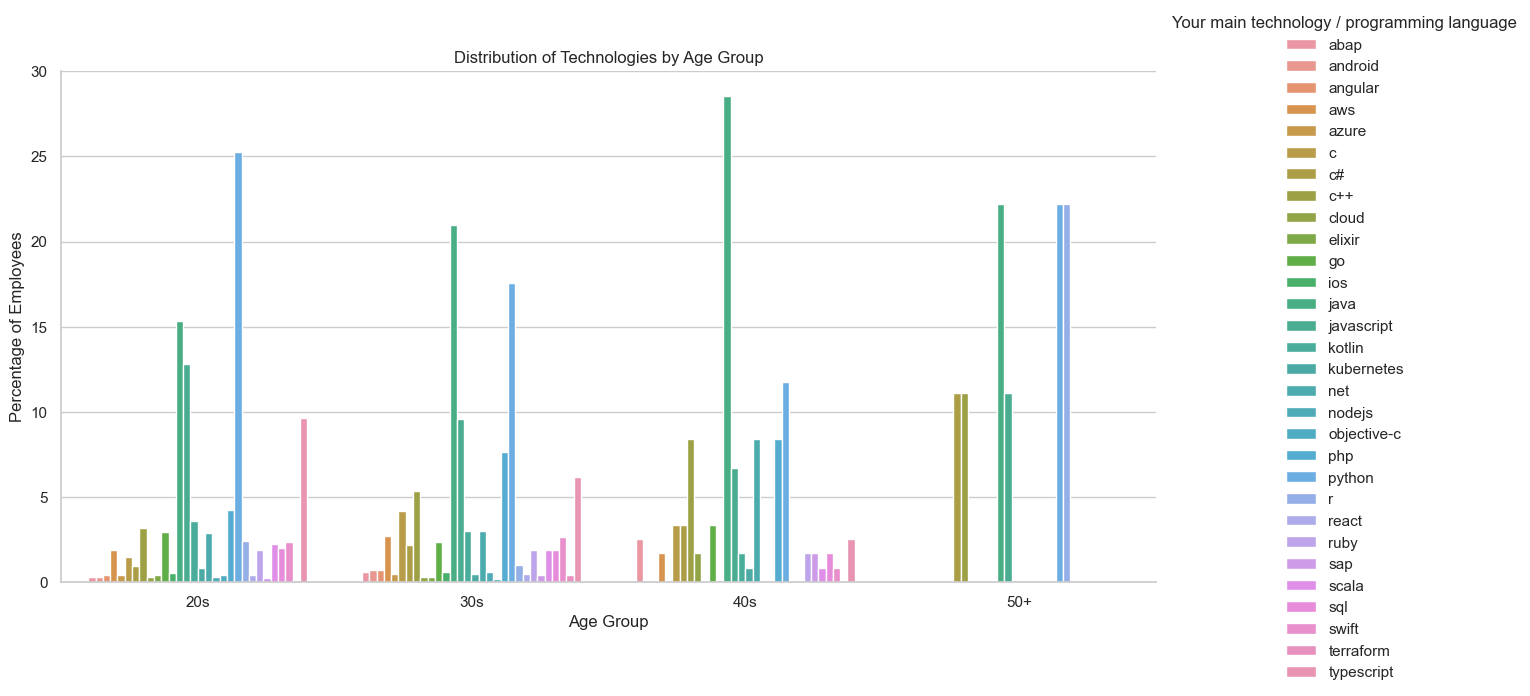

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# define age groups
bins = [20, 30, 40, 50, 120]
labels = ['20s', '30s', '40s', '50+']

# group employees by age group and technology
df_grouped = cleaned_df.groupby([pd.cut(cleaned_df[age], bins, labels=labels), technology]).size().reset_index(name='count')

# calculate percentage of employees in each age group who use each technology
df_grouped['percentage'] = df_grouped.groupby(age)['count'].apply(lambda x: 100 * x / float(x.sum()))

# plot the result using seaborn
sns.set(style='whitegrid')
sns.catplot(x=age, y='percentage', hue=technology, kind='bar', data=df_grouped, height=6, aspect=2)
plt.ylabel('Percentage of Employees')
plt.xlabel('Age Group')
plt.title('Distribution of Technologies by Age Group')
plt.show()

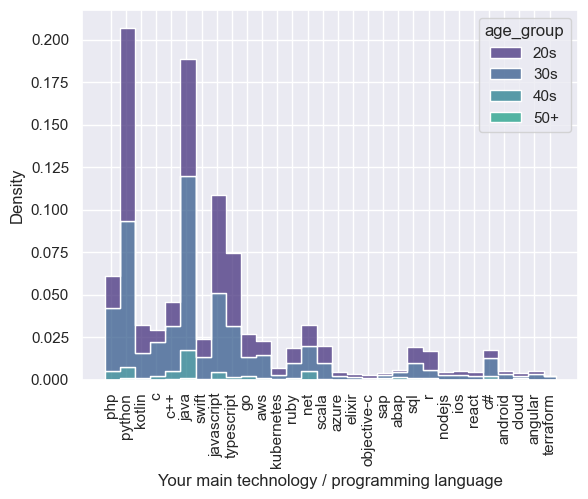

In [89]:
import seaborn as sns

# Categorize ages into age groups
cleaned_df['age_group'] = pd.cut(cleaned_df[age], bins=bins, labels=labels)

# Plot faceted histogram
sns.histplot(data=cleaned_df, x=technology, hue='age_group', multiple='stack', shrink=0.8, element='step', stat='density')
plt.xticks(rotation=90)
plt.show()

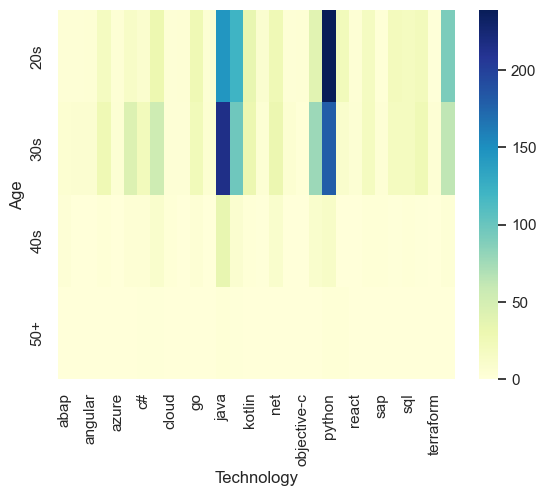

In [94]:
# Create a cross-tabulation table
cross_tab = pd.crosstab(cleaned_df['age_group'], cleaned_df[technology])

# Generate the heatmap
sns.heatmap(cross_tab, cmap='YlGnBu')

# Set the axis labels
plt.xlabel('Technology')
plt.ylabel('Age')

# Display the plot
plt.show()